In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("parkinsons.data")
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

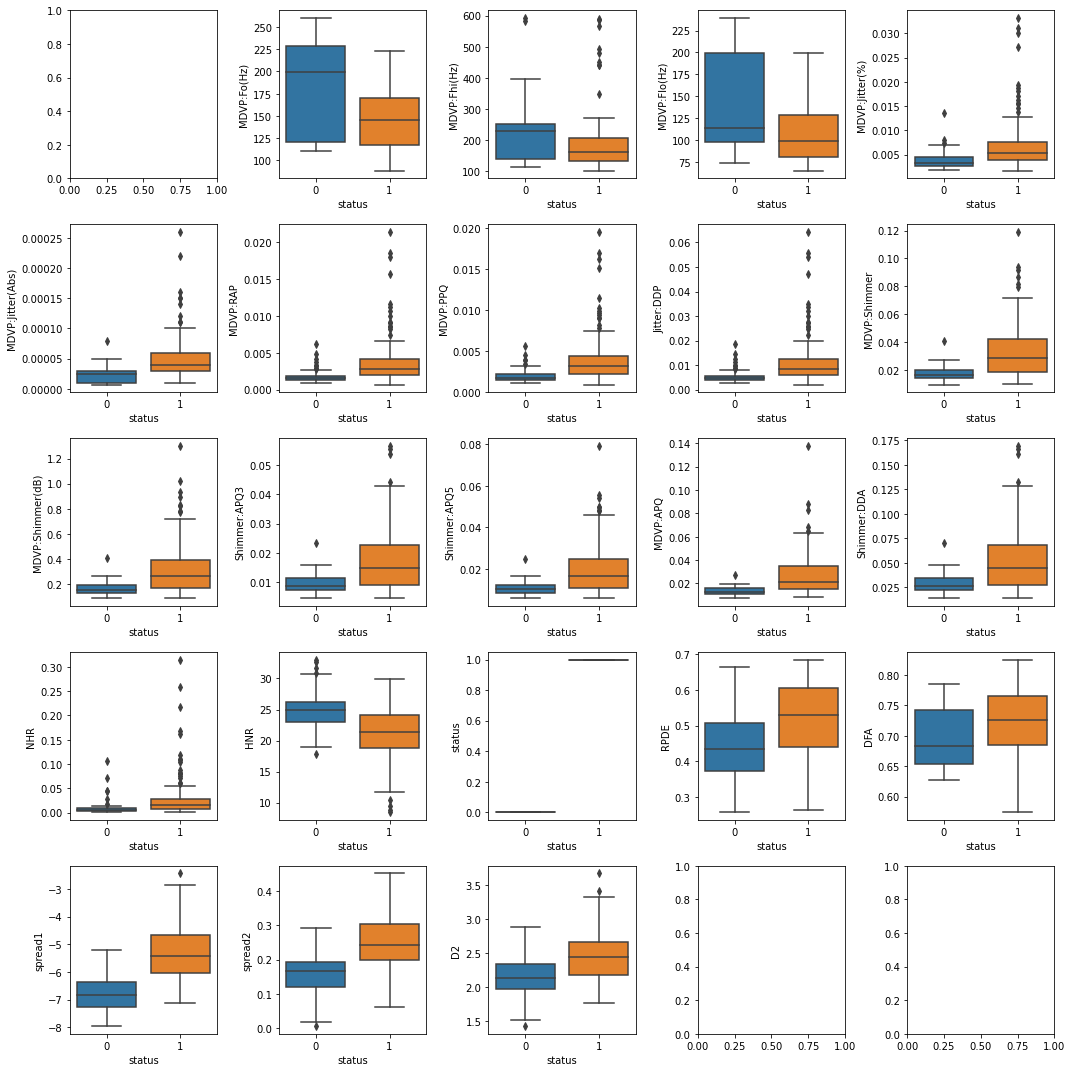

In [5]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

In [6]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [7]:
'''for dataset in data_master: 
    dataset['status'] = dataset['status'].astype(float) 

data_master['status'].value_counts()'''

"for dataset in data_master: \n    dataset['status'] = dataset['status'].astype(float) \n\ndata_master['status'].value_counts()"

In [7]:
X = df.drop(['status', 'name'], axis = 1)
y = df.status

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = print("Train Accuraccy is: ", clf.score(X_train, y_train)*100)
    acc_test = print("Test Accuraccy is: ", clf.score(X_test, y_test)*100)
    
    roc = print("ROC Score: ", roc_auc_score(y_test, y_predicted)*100) 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    print()
    cm = ("Confusion matrix: ", confusion_matrix(y_test, y_predicted))
    correct = ("Total correct: ", tp + tn)
    incorrect = ("Total incorrect: ", fp + fn)
    
    return acc_train, acc_test, roc, correct, incorrect, cm

In [31]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

Train Accuraccy is:  89.70588235294117
Test Accuraccy is:  83.05084745762711
ROC Score:  73.25757575757575

(None, None, None, ('Total correct: ', 49), ('Total incorrect: ', 10), ('Confusion matrix: ', array([[ 8,  7],
       [ 3, 41]], dtype=int64)))


In [32]:
#2. KNN

from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

Y_pred_knn = clf_knn.predict(X_test)
print(clf_scores(clf_knn, Y_pred_knn))

Train Accuraccy is:  93.38235294117648
Test Accuraccy is:  79.66101694915254
ROC Score:  73.18181818181819

(None, None, None, ('Total correct: ', 47), ('Total incorrect: ', 12), ('Confusion matrix: ', array([[ 9,  6],
       [ 6, 38]], dtype=int64)))


In [33]:
#3. Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

Y_pred_gnb = clf_gnb.predict(X_test)
print(clf_scores(clf_gnb, Y_pred_gnb))

Train Accuraccy is:  68.38235294117648
Test Accuraccy is:  74.57627118644068
ROC Score:  76.36363636363637

(None, None, None, ('Total correct: ', 44), ('Total incorrect: ', 15), ('Confusion matrix: ', array([[12,  3],
       [12, 32]], dtype=int64)))


In [34]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [35]:
#Scaling
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# numerical features
num_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_scaled[[i]])
    
    # transform the training data column
    X_train_scaled[i] = scale.transform(X_train_scaled[[i]])
    
    # transform the testing data column
    X_test_scaled[i] = scale.transform(X_test_scaled[[i]])


In [36]:
X_train.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,152.700846,193.653309,117.140831,0.006347,0.000045,0.003390,0.003549,0.010171,0.030158,0.288353,...,0.024723,0.047441,0.027042,21.883375,0.499209,0.722952,-5.691650,0.227666,2.391407,0.207610
std,40.456197,90.595334,42.498586,0.005518,0.000039,0.003396,0.003147,0.010189,0.020824,0.217656,...,0.018937,0.033394,0.046202,4.878857,0.102947,0.054509,1.111704,0.081660,0.403006,0.094557
min,88.333000,102.305000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.018689,1.423287,0.044539
25%,117.262000,134.000250,86.216000,0.003318,0.000020,0.001645,0.001828,0.004933,0.015723,0.140750,...,0.012557,0.023352,0.005257,19.082500,0.419943,0.679358,-6.449115,0.178670,2.101139,0.137414
50%,148.367000,169.299000,105.691000,0.004610,0.000030,0.002320,0.002465,0.006960,0.022110,0.208000,...,0.017645,0.035955,0.011180,22.710000,0.496754,0.729003,-5.818459,0.219660,2.353204,0.186079
75%,181.028500,217.433000,141.284750,0.007113,0.000060,0.003715,0.003912,0.011140,0.038290,0.364250,...,0.030603,0.061700,0.025135,25.488500,0.594800,0.763455,-5.152385,0.270060,2.642326,0.255108
max,252.455000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [37]:
X_train_scaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,...,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02
mean,-3.918434e-17,-2.612289e-17,-4.571507e-17,2.612289e-17,3.918434e-17,5.877651e-17,1.240837e-16,2.612289e-17,2.285753e-17,3.265362e-18,...,-2.285753e-17,-1.534720e-16,-6.530724e-17,-2.155139e-16,-5.510298e-16,-2.726577e-16,-2.775558e-16,8.653209e-17,-9.657308e-16,9.469549e-17
std,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,...,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00
min,-1.596932e+00,-1.012039e+00,-1.220178e+00,-8.488553e-01,-9.811472e-01,-8.008531e-01,-8.385109e-01,-8.009350e-01,-9.937642e-01,-9.377389e-01,...,-9.292686e-01,-1.015919e+00,-5.733499e-01,-2.765416e+00,-2.365653e+00,-2.737507e+00,-2.052469e+00,-2.568568e+00,-2.411129e+00,-1.730950e+00
25%,-8.792190e-01,-6.608904e-01,-7.303574e-01,-5.510278e-01,-6.430711e-01,-5.156707e-01,-5.490878e-01,-5.160033e-01,-6.957749e-01,-6.806542e-01,...,-6.447806e-01,-7.240018e-01,-4.732558e-01,-5.762065e-01,-7.728238e-01,-8.027159e-01,-6.838734e-01,-6.022160e-01,-7.229212e-01,-7.451072e-01
50%,-1.075204e-01,-2.698190e-01,-2.704127e-01,-3.159486e-01,-3.830126e-01,-3.161908e-01,-3.457741e-01,-3.162802e-01,-3.879049e-01,-3.705384e-01,...,-3.751331e-01,-3.452238e-01,-3.445945e-01,1.700564e-01,-2.394022e-02,1.114191e-01,-1.144891e-01,-9.840379e-02,-9.514593e-02,-2.285470e-01
75%,7.027941e-01,2.634529e-01,5.702114e-01,1.392046e-01,3.971629e-01,9.606760e-02,1.158677e-01,9.547944e-02,3.919522e-01,3.499906e-01,...,3.116398e-01,4.285623e-01,-4.143403e-02,7.416599e-01,9.319774e-01,7.457925e-01,4.868733e-01,5.210746e-01,6.249202e-01,5.041847e-01
max,2.474848e+00,4.413576e+00,2.881985e+00,4.876709e+00,5.598333e+00,5.334262e+00,5.112602e+00,5.335071e+00,4.285936e+00,4.674318e+00,...,5.992258e+00,3.666171e+00,6.251727e+00,2.296623e+00,1.812867e+00,1.884330e+00,2.941126e+00,2.738812e+00,3.187247e+00,3.394136e+00


In [38]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled, y_train)

Y_pred_lr = clf_lr.predict(X_test_scaled)
print(clf_scores(clf_lr, Y_pred_lr))

Train Accuraccy is:  24.264705882352942
Test Accuraccy is:  25.423728813559322
ROC Score:  77.72727272727272

(None, None, None, ('Total correct: ', 51), ('Total incorrect: ', 8), ('Confusion matrix: ', array([[ 9,  6],
       [ 2, 42]], dtype=int64)))


In [39]:
#2. KNN

from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_scaled, y_train)

Y_pred_knn = clf_knn.predict(X_test_scaled)
print(clf_scores(clf_knn, Y_pred_knn))

Train Accuraccy is:  24.264705882352942
Test Accuraccy is:  25.423728813559322
ROC Score:  87.72727272727273

(None, None, None, ('Total correct: ', 54), ('Total incorrect: ', 5), ('Confusion matrix: ', array([[12,  3],
       [ 2, 42]], dtype=int64)))


In [40]:
#3. Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_scaled, y_train)

Y_pred_gnb = clf_gnb.predict(X_test_scaled)
print(clf_scores(clf_gnb, Y_pred_gnb))

Train Accuraccy is:  24.264705882352942
Test Accuraccy is:  25.423728813559322
ROC Score:  77.50000000000001

(None, None, None, ('Total correct: ', 45), ('Total incorrect: ', 14), ('Confusion matrix: ', array([[12,  3],
       [11, 33]], dtype=int64)))


In [41]:
#4. SVM

from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

Y_pred_svm = clf_svm.predict(X_test_scaled)
print(clf_scores(clf_svm, Y_pred_svm))

Train Accuraccy is:  75.73529411764706
Test Accuraccy is:  74.57627118644068
ROC Score:  76.66666666666666

(None, None, None, ('Total correct: ', 52), ('Total incorrect: ', 7), ('Confusion matrix: ', array([[ 8,  7],
       [ 0, 44]], dtype=int64)))


In [43]:
#Meta-classifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf_knn, clf_svm, clf_gnb], 
                          meta_classifier=lr)
sclf.fit(X_train_scaled, y_train)
for clf, label in zip([clf_knn, clf_svm, clf_gnb, sclf], 
                      ['KNN', 
                       'SVM', 
                       'Naive Bayes',
                       'StackingClassifier']):

    Y_pred = clf.predict(X_test_scaled)
    scores = clf_scores(clf, Y_pred)
    #scores = model_selection.cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    print(scores, label)

Train Accuraccy is:  24.264705882352942
Test Accuraccy is:  25.423728813559322
ROC Score:  87.72727272727273

(None, None, None, ('Total correct: ', 54), ('Total incorrect: ', 5), ('Confusion matrix: ', array([[12,  3],
       [ 2, 42]], dtype=int64))) KNN
Train Accuraccy is:  75.73529411764706
Test Accuraccy is:  74.57627118644068
ROC Score:  76.66666666666666

(None, None, None, ('Total correct: ', 52), ('Total incorrect: ', 7), ('Confusion matrix: ', array([[ 8,  7],
       [ 0, 44]], dtype=int64))) SVM
Train Accuraccy is:  24.264705882352942
Test Accuraccy is:  25.423728813559322
ROC Score:  77.50000000000001

(None, None, None, ('Total correct: ', 45), ('Total incorrect: ', 14), ('Confusion matrix: ', array([[12,  3],
       [11, 33]], dtype=int64))) Naive Bayes
Train Accuraccy is:  24.264705882352942
Test Accuraccy is:  25.423728813559322
ROC Score:  87.72727272727273

(None, None, None, ('Total correct: ', 54), ('Total incorrect: ', 5), ('Confusion matrix: ', array([[12,  3],
  